In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

In [2]:
dihedral = "1_2_3_4"
seed_no = 4
fragment = 1

Average the forward and backward QM profiles

In [3]:
file_pattern = 'profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_*_normalised.csv' % (fragment, dihedral, dihedral, seed_no)

file_list = glob.glob(file_pattern)

In [4]:
df1 = pd.read_csv(file_list[0])
df2 = pd.read_csv(file_list[1])

combined_df = pd.merge(df1, df2, on=None, how='outer')

In [5]:
combined_df = combined_df.drop(columns=["Unnamed: 0"])
combined_df = combined_df.drop(columns=["Conformer"])
combined_df = combined_df.drop(columns=["Scan_Type"])
combined_df

,-70,-60,-50,-40,-30,-20,-10,0,10,20,...,-170.1,-160.1,-150.1,-140.1,-130.1,-120.1,-110.1,-100.1,-90.1,-80.1
0,1.454747,1.793366,2.330672,3.153712,4.184890,5.214100,6.004232,6.230886,5.587945,4.358301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.443547,1.778193,2.319125,3.137438,4.171889,5.203922,5.988333,6.222689,5.583215,4.353127,...,0.220146,0.752906,1.489411,2.214978,2.704945,2.779129,2.321057,1.618537,1.189072,1.235897


In [6]:
combined_df.to_csv('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_fwd_bwd_combined.csv' % (fragment, dihedral, dihedral, seed_no))

In [7]:
column_averages = {}

# Iterate over columns
for column in combined_df.columns:
    # Calculate the average for each column
    avg = combined_df[column].mean()
    column_averages[column] = avg

print("Column Averages:")
for column, avg in column_averages.items():
    print(f"{column}: {avg}")

Column Averages:
-70: 1.4491471279179677
-60: 1.7857792289723875
-50: 2.324898083752487
-40: 3.145575264468789
-30: 4.17838937669876
-20: 5.209011408282095
-10: 5.996282524589333
0: 6.226787386694923
10: 5.585580054961611
20: 4.355713900222327
30: 2.961046377866296
40: 1.7287380183988716
50: 0.8156443826301256
60: 0.42489304751507007
70: 0.5671290888567455
80: 1.0698183565109503
90: 1.820609089336358
100: 2.6202039980562404
110: 3.213589070888702
120: 3.3760461447091075
130: 3.0303337775549153
140: 2.286417561947019
150: 1.392500067828223
160: 0.6082081791100791
170: 0.1152273625339148
180: 0.0
170.1: 0.1159392721601761
160.1: 0.6025123677682132
150.1: 1.391977277729893
140.1: 2.291340893512825
130.1: 3.035736568737775
120.1: 3.3781502290512435
110.1: 3.2154896160936914
100.1: 2.6279660354484804
90.1: 1.8322194038482849
80.1: 1.08498136405251
70.1: 0.5664604178455193
60.1: 0.4287116256600711
50.1: 0.822648132161703
40.1: 1.68968481925549
30.1: 2.9605834459362086
20.1: 4.348813067772426

In [8]:
column_averages = {}
avg_list = []

# iterate over the range from -180 to 180 with a step of 10
for i in range(-180, 181, 10):
    # Create keys for each pair of values, e.g., '-180', '-180.1'
    key1 = str(i)
    key2 = str(i) + '.1'

    # Check if both keys exist in the DataFrame
    if key1 in combined_df.columns and key2 in combined_df.columns:
        # Calculate the mean while ignoring NaN values for both keys
        mean_value = np.nanmean(combined_df[[key1, key2]].values)
        column_averages[key1] = mean_value
    elif key1 in combined_df.columns and key2 not in combined_df.columns:
        mean_value = np.nanmean(combined_df[[key1]].values)
        column_averages[key1] = mean_value
    elif key2 in combined_df.columns and key1 not in combined_df.columns:
        mean_value = np.nanmean(combined_df[[key2]].values)
        column_averages[key1] = mean_value
    # else:
    #     column_averages[key1] = np.nan  # Set to NaN if one or both keys are not present in DataFrame

for key, avg in column_averages.items():
    avg_list.append(avg)

/tmp/ipykernel_2459423/1813751915.py:16: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(combined_df[[key1]].values)


In [11]:
avg_list

[nan,
 0.21715825304272576,
 0.7641601529321633,
 1.4948647300964997,
 2.211282970083024,
 2.6976910154820266,
 2.7684227399489223,
 2.3158975706028286,
 1.613685540059426,
 1.1918549954037492,
 1.2245103123326164,
 1.4611617224436486,
 1.7932867886459765,
 2.3250372735298392,
 3.1452305427422593,
 4.173839955804094,
 5.202704949566396,
 5.987268543879812,
 6.225291912822286,
 5.585357185967344,
 4.353413622739026,
 2.9608920672229337,
 1.7157202853510778,
 0.8179789658073181,
 0.4261659068967371,
 0.5669061985196701,
 1.0748726923581369,
 1.8244791941736669,
 2.622791343853654,
 3.2142225859570317,
 3.376747506156486,
 3.032134707949202,
 2.2880586724689542,
 1.3923258044621132,
 0.6063095753294571,
 0.11546466574266856,
 0.0]

In [ ]:
# normalise average energy and check if values for -180 and 180 are missing (usually -180 is always missing)

norm_avg_energy = []

if avg_list[0] == []:
    for enrg in avg_list[1:]: 
        norm_avg_energy.append(enrg-np.min(avg_list[1:]))
elif avg_list[0] == [] and avg_list[-1] == []:
    for enrg in avg_list[1:-1]: 
        norm_avg_energy.append(enrg-np.min(avg_list[1:-1]))

norm_avg_energy

[0.21715825304272576,
 0.7641601529321633,
 1.4948647300964997,
 2.211282970083024,
 2.6976910154820266,
 2.7684227399489223,
 2.3158975706028286,
 1.613685540059426,
 1.1918549954037492,
 1.2245103123326164,
 1.4611617224436486,
 1.7932867886459765,
 2.3250372735298392,
 3.1452305427422593,
 4.173839955804094,
 5.202704949566396,
 5.987268543879812,
 6.225291912822286,
 5.585357185967344,
 4.353413622739026,
 2.9608920672229337,
 1.7157202853510778,
 0.8179789658073181,
 0.4261659068967371,
 0.5669061985196701,
 1.0748726923581369,
 1.8244791941736669,
 2.622791343853654,
 3.2142225859570317,
 3.376747506156486,
 3.032134707949202,
 2.2880586724689542,
 1.3923258044621132,
 0.6063095753294571,
 0.11546466574266856,
 0.0]

In [12]:
np.save('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_fwd_bwd_average.npy' % (fragment, dihedral, dihedral, seed_no), norm_avg_energy)

In [13]:
qm_energy = np.load('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_fwd_bwd_average.npy' % (fragment, dihedral, dihedral, seed_no))
qm_energy

array([0.21715825, 0.76416015, 1.49486473, 2.21128297, 2.69769102,
       2.76842274, 2.31589757, 1.61368554, 1.191855  , 1.22451031,
       1.46116172, 1.79328679, 2.32503727, 3.14523054, 4.17383996,
       5.20270495, 5.98726854, 6.22529191, 5.58535719, 4.35341362,
       2.96089207, 1.71572029, 0.81797897, 0.42616591, 0.5669062 ,
       1.07487269, 1.82447919, 2.62279134, 3.21422259, 3.37674751,
       3.03213471, 2.28805867, 1.3923258 , 0.60630958, 0.11546467,
       0.        ])

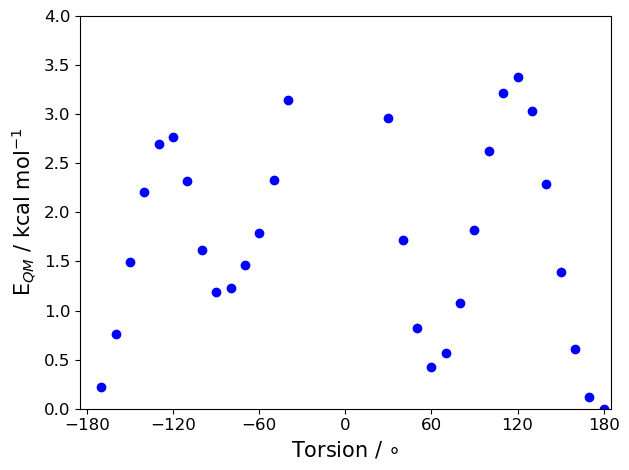

In [ ]:
import matplotlib.pyplot as plt
forward = list(range(-170, 181, 10)) # here -180 has been excluded as no MM energy was available, modify according to your data
idx = 0
for i in qm_energy:
    plt.plot(forward[idx], i, marker='o', linestyle='None', color='blue')
    idx += 1

plt.xlabel('Torsion / $\circ$', fontsize=15)
plt.ylabel('E$_{QM}$ / kcal mol$^{-1}$', fontsize=15)

plt.xticks(range(-180, 181, 60), fontsize=12) 
plt.yticks(fontsize=12) 

plt.xlim(-185, 185)
plt.ylim(0.0,4)
plt.rcParams['figure.dpi'] = 300
plt.tight_layout()
plt.show()


Subtract MM,total - MM,torsion from QM energy

In [16]:
mm_energy = np.load('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_mm.npy' % (fragment, dihedral, dihedral, seed_no))

In [18]:
assert len(qm_energy) == len(mm_energy)

energy_to_fit = qm_energy - mm_energy

In [19]:
# normalising the QM-MM difference

energy_to_fit_norm = []

for i in energy_to_fit:
    energy_to_fit_norm.append(i-min(energy_to_fit))

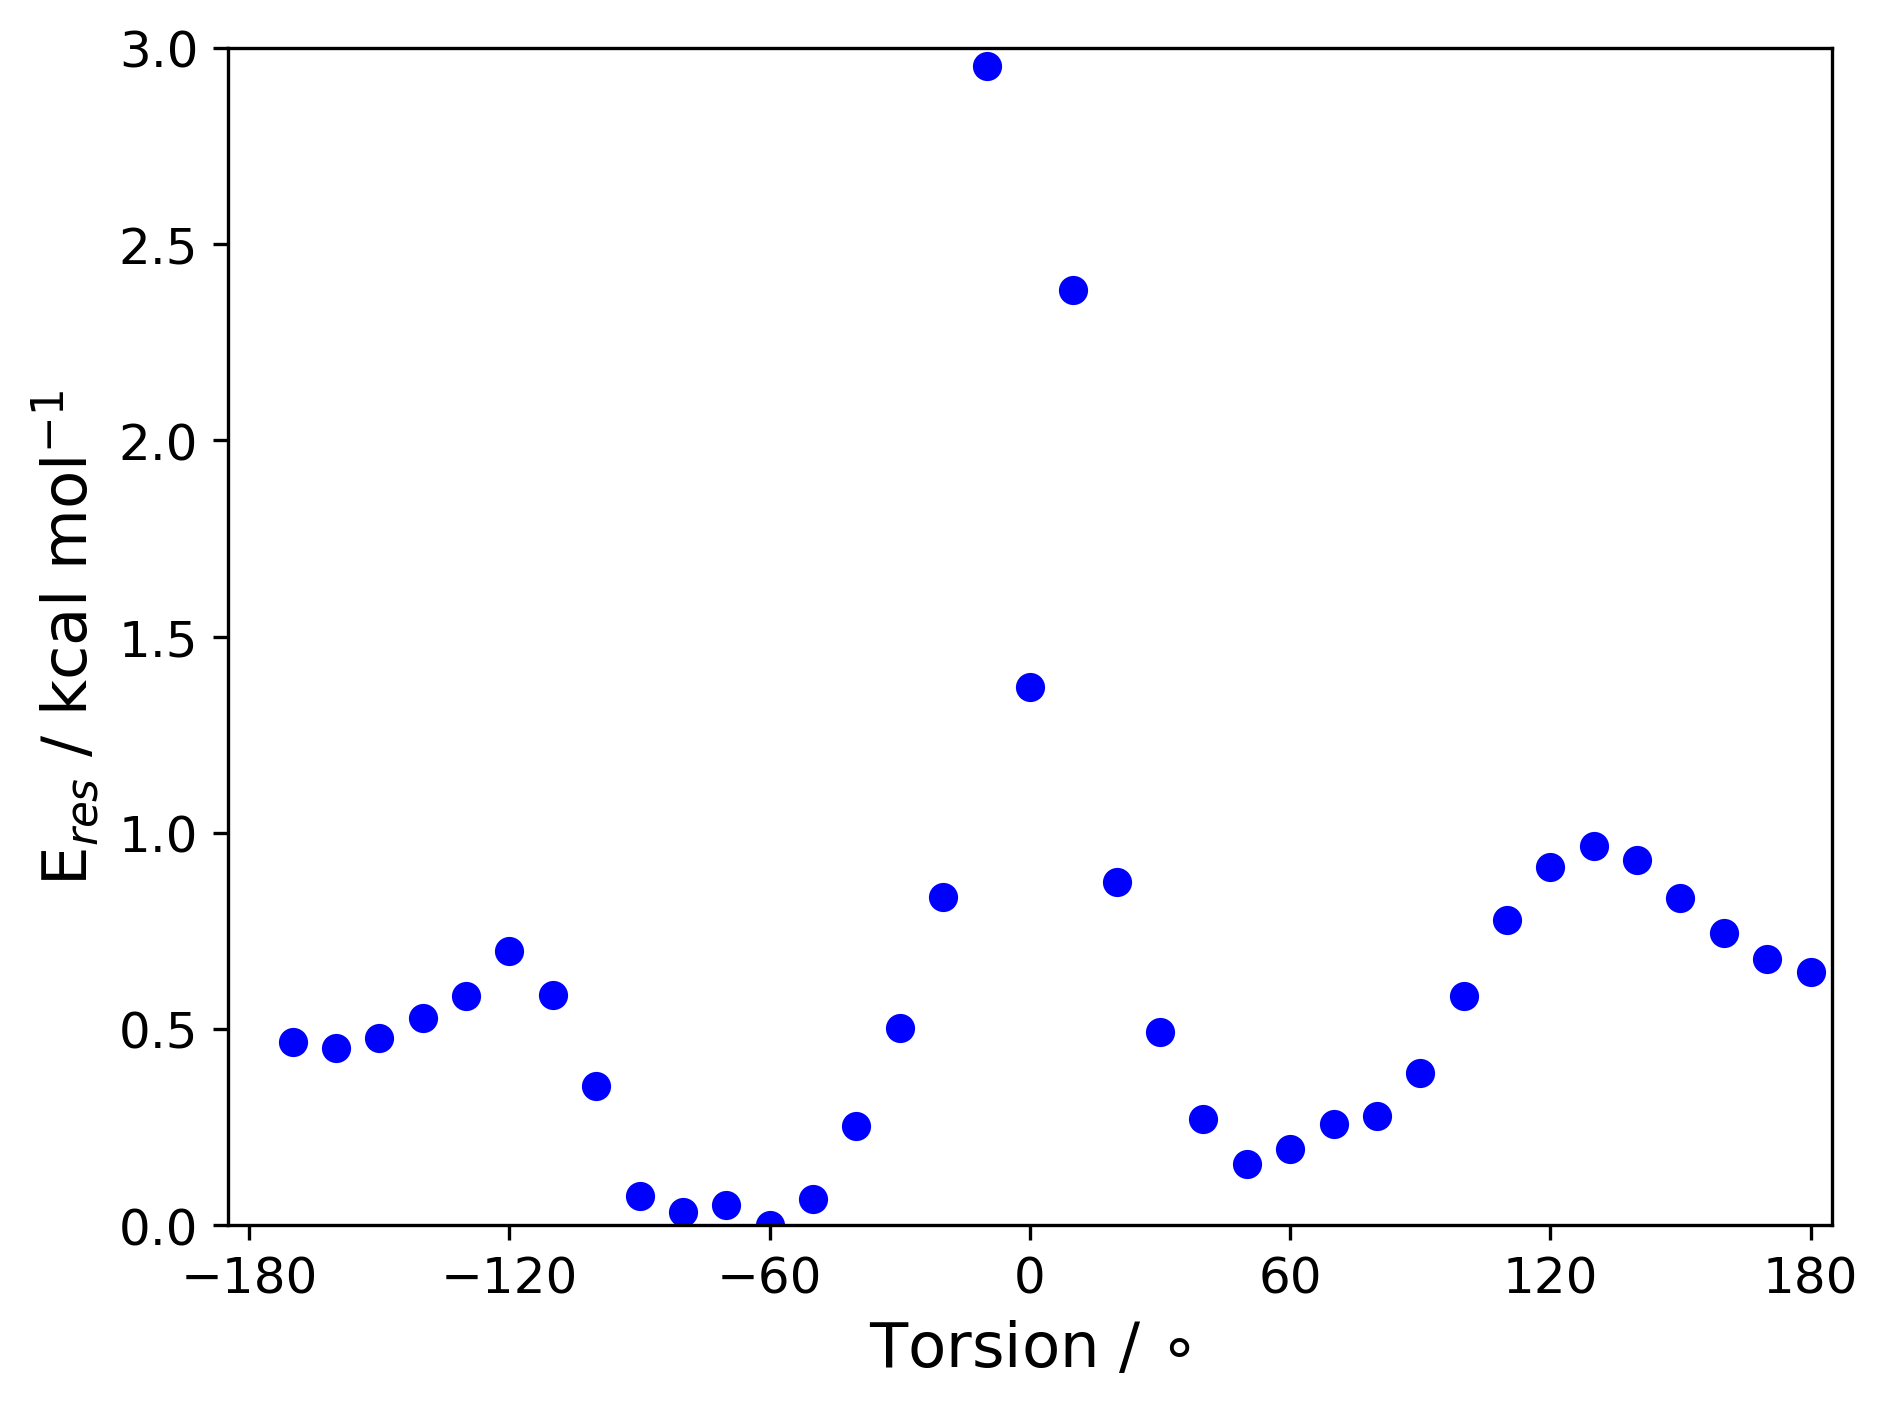

In [20]:
import matplotlib.pyplot as plt

idx = 0
for i in energy_to_fit_norm:
    plt.plot(forward[idx], i, marker='o', linestyle='None', color='blue')
    idx += 1

plt.xlabel('Torsion / $\circ$', fontsize=15)
plt.ylabel('E$_{res}$ / kcal mol$^{-1}$', fontsize=15)

plt.xticks(range(-180, 181, 60), fontsize=12) 
plt.yticks(fontsize=12) 


plt.xlim(-185, 185)
plt.ylim(0.0,3.0)
plt.rcParams['figure.dpi'] = 300
plt.tight_layout()
plt.show()


In [21]:
np.save('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/qm-mm_torsion%s_seed%s.npy' % (fragment, dihedral, dihedral, seed_no), energy_to_fit_norm)